Found 1429 images belonging to 8 classes.
Found 135 images belonging to 8 classes.
Epoch 1/5
44/44 [==============================] - 1562s 35s/step - loss: 2.0736 - accuracy: 0.1546 - val_loss: 2.0673 - val_accuracy: 0.1953
Training Accuracy: 0.1546, Training Loss: 2.0736
Testing Accuracy: 0.1953
Epoch 2/5
44/44 [==============================] - 1523s 35s/step - loss: 2.0834 - accuracy: 0.1696 - val_loss: 2.0824 - val_accuracy: 0.1562
Training Accuracy: 0.1696, Training Loss: 2.0834
Testing Accuracy: 0.1562
Epoch 3/5
44/44 [==============================] - 1514s 34s/step - loss: 2.0473 - accuracy: 0.2026 - val_loss: 1.9178 - val_accuracy: 0.3516
Training Accuracy: 0.2026, Training Loss: 2.0473
Testing Accuracy: 0.3516
Epoch 4/5
44/44 [==============================] - 1522s 35s/step - loss: 1.8434 - accuracy: 0.3135 - val_loss: 1.9645 - val_accuracy: 0.1562
Training Accuracy: 0.3135, Training Loss: 1.8434
Testing Accuracy: 0.1562
Epoch 5/5
44/44 [==============================] - 15

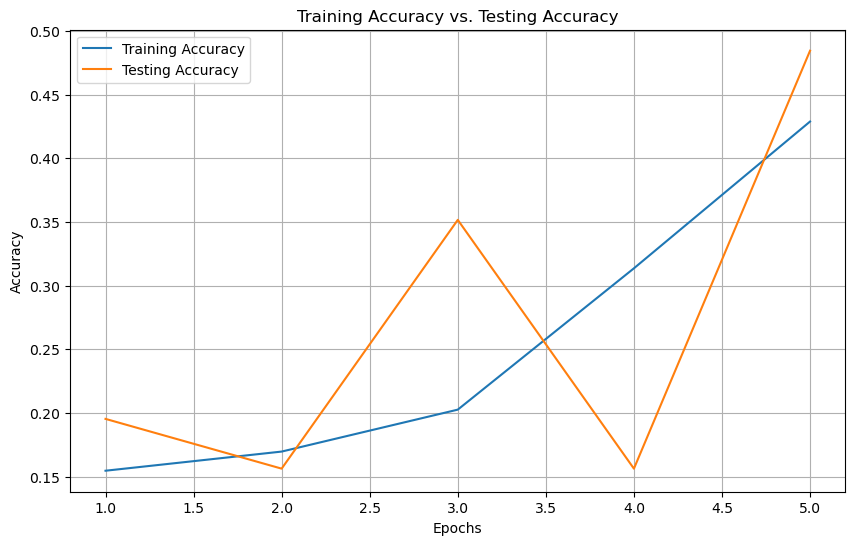

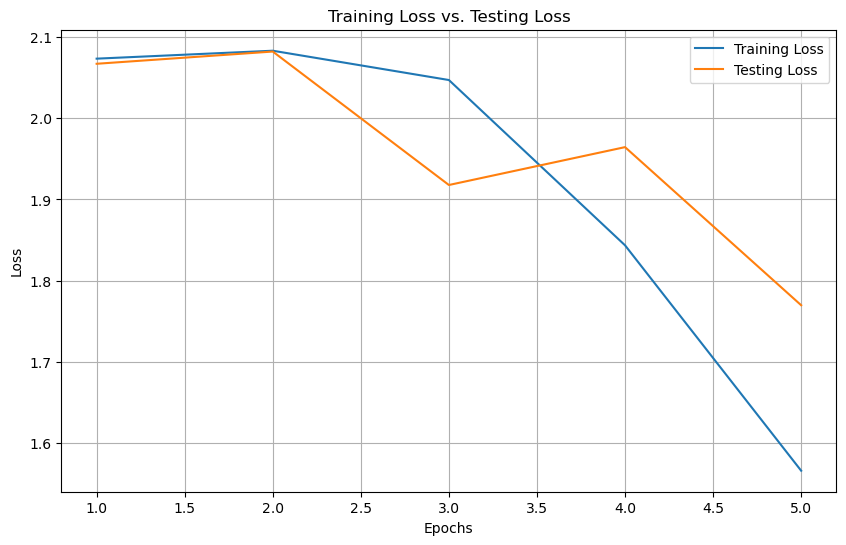

1/1 [==============================] - 2s 2s/step
Predicted Class: FLOWERS


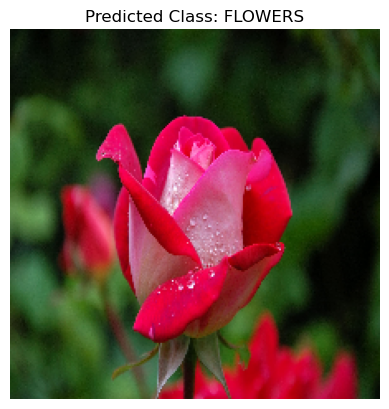

5/5 [==============================] - 53s 7s/step


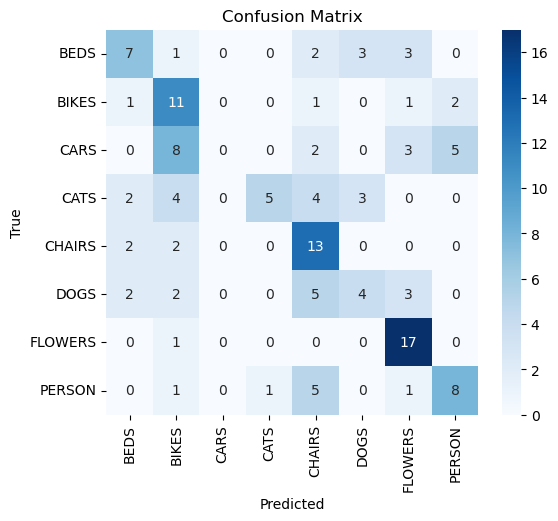

Classification Report:
              precision    recall  f1-score   support

        BEDS       0.50      0.44      0.47        16
       BIKES       0.37      0.69      0.48        16
        CARS       0.00      0.00      0.00        18
        CATS       0.83      0.28      0.42        18
      CHAIRS       0.41      0.76      0.53        17
        DOGS       0.40      0.25      0.31        16
     FLOWERS       0.61      0.94      0.74        18
      PERSON       0.53      0.50      0.52        16

    accuracy                           0.48       135
   macro avg       0.46      0.48      0.43       135
weighted avg       0.46      0.48      0.43       135



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [3]:
import os
import numpy as np
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns



# Set the paths to your train, test, and validation data
train_dir = '/kaggle/input/vgg16-dataset/DL P dataset/TRAIN'
test_dir = '/kaggle/input/vgg16-dataset/DL P dataset/TEST'
validation_dir = '/kaggle/input/vgg16-dataset/DL P dataset/VALID'

# Set hyperparameters
epochs = 5
batch_size = 32
learning_rate = 0.0001

# Preprocess the images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',  # Set to 'categorical' for multi-class classification
    shuffle=True  # Set to True for shuffling the data
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Do not shuffle validation data
)

# VGG16 architecture
def vgg16_model():
    model = Sequential()
    
    # Conv Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Conv Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Conv Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Conv Block 4
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Conv Block 5
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(8, activation='softmax'))
    
    return model

# Build VGG16 architecture
model = vgg16_model()

# Compile the model with RMSprop optimizer
optimizer = RMSprop(learning_rate=learning_rate)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# Lists to store training and testing accuracy, and training and testing loss
train_accuracy_list = []
test_accuracy_list = []
train_loss_list = []
test_loss_list = []

# Training loop
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    
    # Train the model for one epoch
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.n // batch_size,
        epochs=1,
        validation_data=validation_generator,
        validation_steps=validation_generator.n // batch_size
    )
    
    # Calculate and store training accuracy, training loss, testing accuracy, and testing loss
    train_accuracy = history.history['accuracy'][0]
    train_loss = history.history['loss'][0]
    test_accuracy = history.history['val_accuracy'][0]
    test_loss = history.history['val_loss'][0]
    
    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    
    print(f"Training Accuracy: {train_accuracy:.4f}, Training Loss: {train_loss:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
#     , Testing Loss: {test_loss:.4f}

# Plot training accuracy vs. testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_accuracy_list, label='Training Accuracy')
plt.plot(range(1, epochs + 1), test_accuracy_list, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs. Testing Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training loss vs. testing loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_loss_list, label='Training Loss')
plt.plot(range(1, epochs + 1), test_loss_list, label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs. Testing Loss')
plt.legend()
plt.grid()
plt.show()
    
    
    
    
#Validating the model    

from tensorflow.keras.models import load_model

# ... (code for model training)
model.save('/kaggle/working/model.pth')
# Save the trained model
model.save('/kaggle/working/model.pth')




import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = tf.keras.models.load_model('/kaggle/working/model.pth')

# Load and preprocess the test image
img_path = '/kaggle/input/vgg16-dataset/DL P dataset/testing/flower_test.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Normalize the image

# Make prediction
prediction = model.predict(img)
predicted_class_index = np.argmax(prediction)

# Class labels mapping
class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())

# Get the class name from the class index
predicted_class_name = class_labels[predicted_class_index]

# Print the predicted class name
print(f"Predicted Class: {predicted_class_name}")

# Display the image
plt.imshow(img[0])
plt.axis('off')
plt.title(f"Predicted Class: {predicted_class_name}")
plt.show()

# Assuming the 'classes' variable contains the list of class names
classes = list(train_generator.class_indices.keys())

# Get true labels and predicted labels for the test set
Y_true = []
Y_pred = []


# Calculate and plot the confusion matrix
Y_true = validation_generator.classes
Y_pred = model.predict(validation_generator).argmax(axis=1)
cm = confusion_matrix(Y_true, Y_pred)
class_names = classes

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(Y_true, Y_pred, target_names=classes))
